In [25]:
import numpy as np
import pocomc as pc

In [11]:
d = np.load("../results.npz", allow_pickle=True)
results = d["results"][()]
true_params = d["true_params"][()]

In [21]:
bins = list(results.keys())
nfg = list(results[bins[0]].keys())

for b in bins:
    print(f"Bin {b}:")
    print("----------")
    for n in nfg:
        z = results[b][n]["logz_bs"]
        ze = results[b][n]["logz_bs_error"]
        print(f"nfg={n}, log z={z:.3f}+-{ze:.3f}")
    print("\n")

Bin 0:
----------
nfg=4, log z=-61.130+-0.004
nfg=5, log z=-35.557+-0.004


Bin 1:
----------
nfg=4, log z=-59.213+-0.004
nfg=5, log z=-35.245+-0.005




In [38]:
def print_stats(results):
    estimated_params = np.mean(results['samples'], axis=0)
    std_vals = np.std(results['samples'], axis=0)
    print('Mean values = ', estimated_params)
    print('Standard deviation values = ', std_vals)
    print()
    print(f"Relative errors %: {100 * np.abs(1 - np.array(list(true_params.values())) /estimated_params)}")
    print(f"Number of sigmas from truth: {np.abs(estimated_params-np.array(list(true_params.values())))/std_vals}")

def plot(r, labels=["a", "w", "$\\nu_{21}$"]):
    _ = pc.plotting.run(r0, width=7, height=7)
    _ = pc.plotting.trace(r0, labels=labels)
    _ = pc.plotting.corner(r0, labels=labels, truths=list(true_params.values()), truth_color="k")

Mean values =  [-0.26172337 21.675016   79.59473   ]
Standard deviation values =  [0.01467331 0.6525772  0.13789265]

Relative errors %: [23.58343831  7.72786683  0.50917122]
Number of sigmas from truth: [4.20650503 2.56677118 2.93905035]


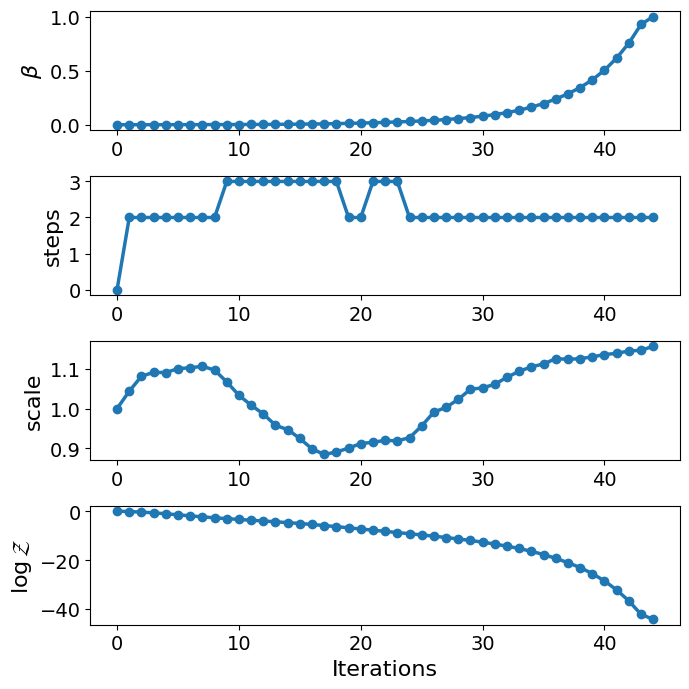

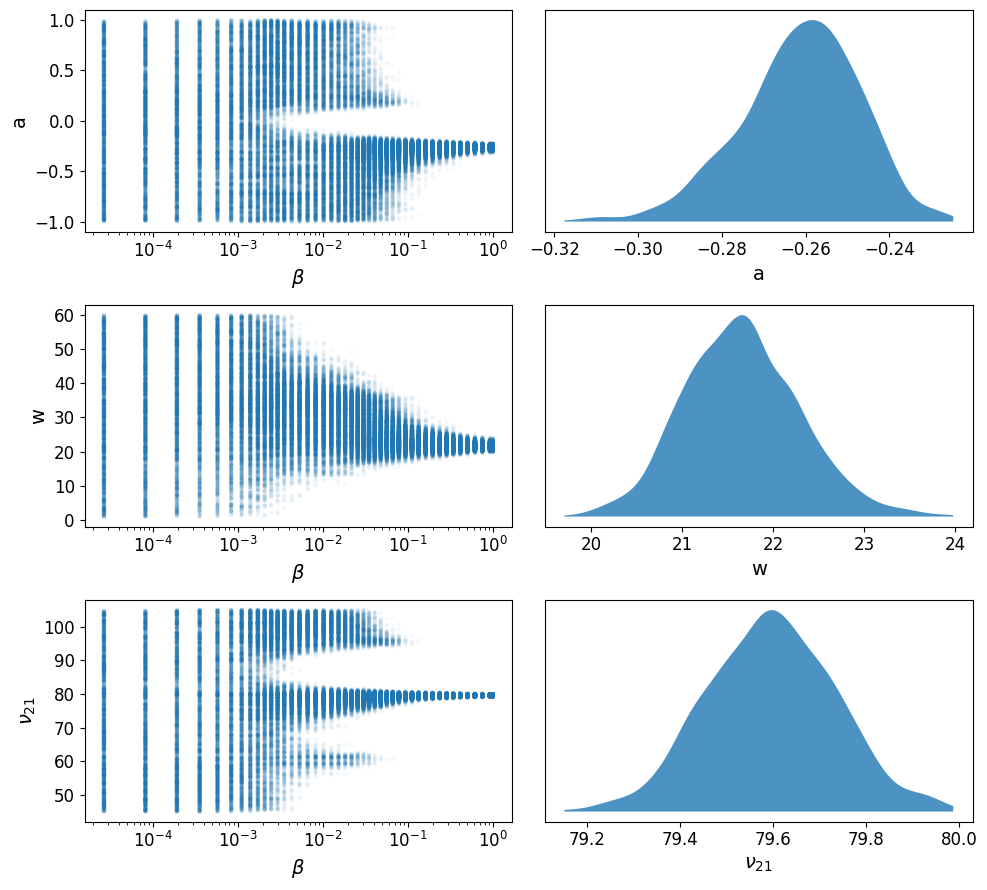

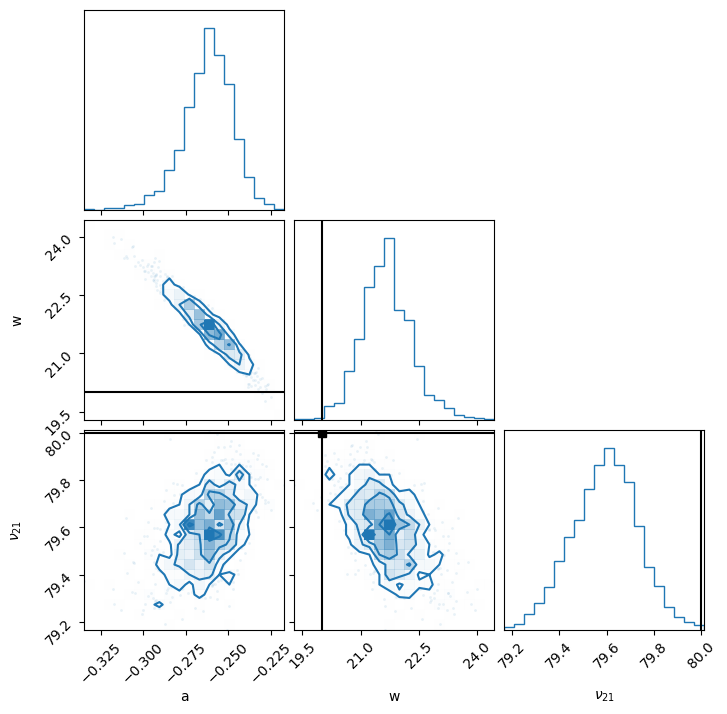

In [39]:
r0 = results[0][5]
print_stats(r0)
plot(r0)

Mean values =  [-0.26967046 22.128777   79.43876   ]
Standard deviation values =  [0.01519756 0.64735377 0.14167126]

Relative errors %: [25.83540574  9.61994688  0.70650795]
Number of sigmas from truth: [4.58431908 3.28842845 3.96157392]


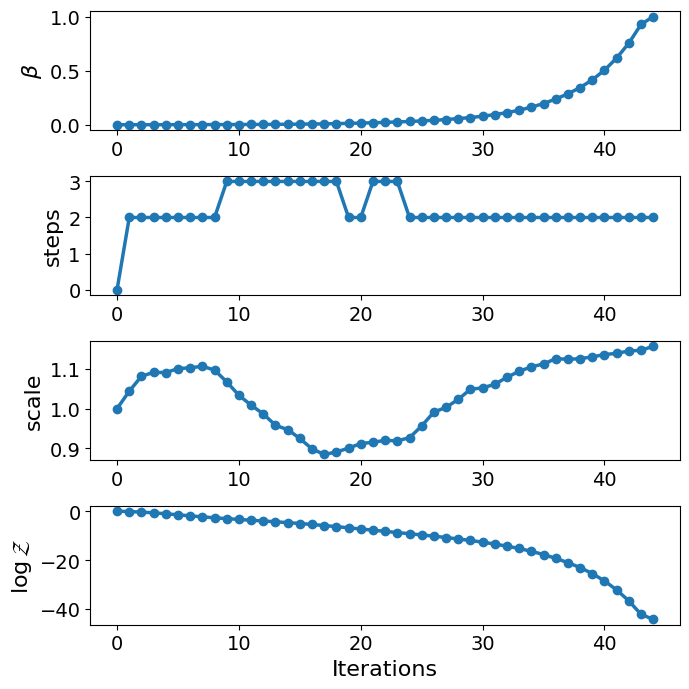

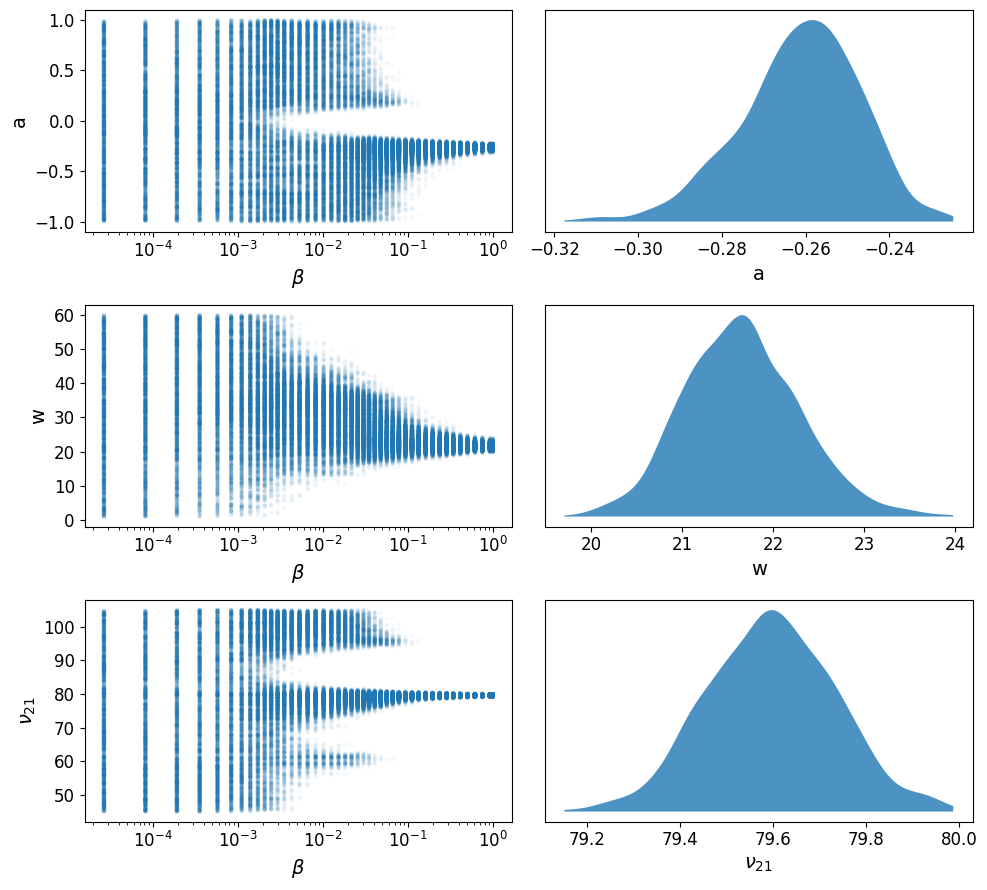

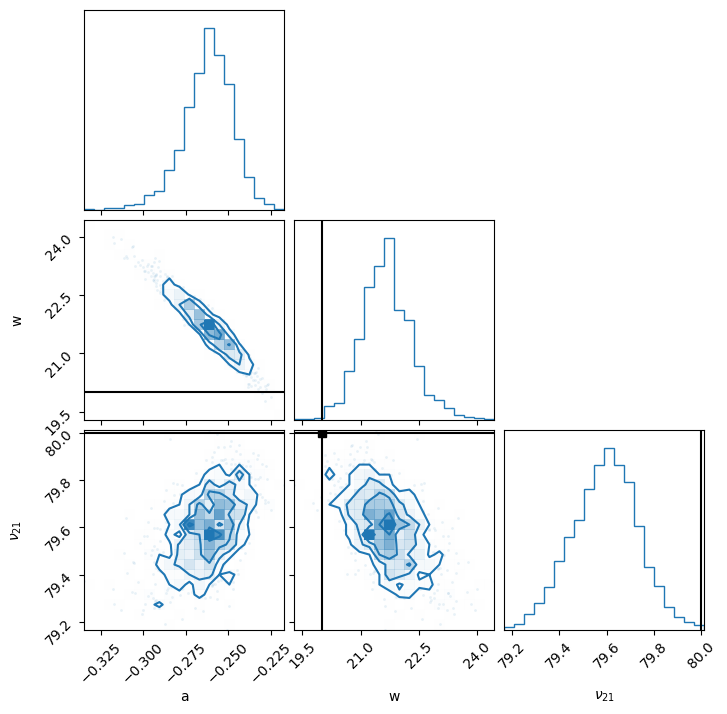

In [41]:
r1 = results[1][5]
print_stats(r1)
plot(r1)